<a href="https://colab.research.google.com/github/mikias21/deep_learning_with_python/blob/main/deep_learning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with python

### Chapter 2 : The mathematical building blocks of neural networks

*Note In machine learning, a category in a classification problem is called a
class. Data points are called samples. The class associated with a specific sample is called a label.*


*   An ***optimizer***-The mechanism through which the model will update itself based
on the training data it sees, so as to improve its performance.
*   A ***loss function***—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
* ***Metrics*** to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In general, all current machine learning systems use tensors
as their basic data structure. **Tensors** are fundamental to the field—so fundamental that TensorFlow was named after them.

At its core, a **tensor** is a container for data—usually numerical data. So, it’s a container for numbers. You may be already familiar with matrices, which are rank-2 tensors: tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis).

A tensor that contains only one number is called a ***scalar*** (or scalar tensor, or rank-0 tensor, or 0D tensor). The number of axes of a tensor is also
called its ***rank***.
```
>>> import numpy as np
>>> x = np.array(12)
>>> x
array(12)
>>> x.ndim
0
```
An array of numbers is called a vector, or rank-1 tensor, or 1D tensor. A rank-1 tensor is said to have exactly one axis. This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D
vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis).

***Dimensionality*** can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a
5D tensor), which can be confusing at times.
```
>>> x = np.array([12, 3, 6, 14, 7])
>>> x
array([12, 3, 6, 14, 7])
>>> x.ndim
1
```

An array of vectors is a matrix, or rank-2 tensor, or 2D tensor. A matrix has two axes (often referred to as rows and columns). You can visually interpret a matrix as a rectangular grid of numbers.
```
>>> x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
>>> x.ndim
2
```
In deep learning, you’ll generally manipulate tensors with ranks 0 to 4, although you may go up to 5 if you process video data.

#### Key Attributes
A tensor is defined by three key attributes:
* ***Number of axes (rank)***—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.
* ***Shape***—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ()
* ***Data type (usually called dtype in Python libraries)***—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on.



(60000, 28, 28) 60000
(10000, 28, 28) 10000


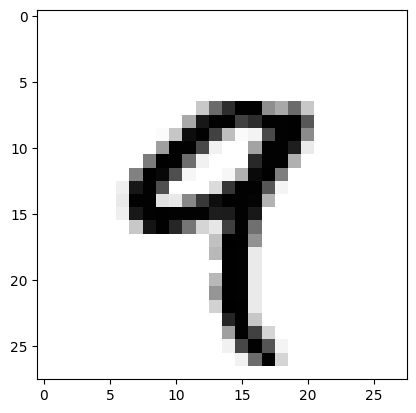

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2644 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1081 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0714 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0518 - accuracy: 0.9844
Epoch 5/5
1/1 [==============================] - 0s 60ms/step
[7.1969403e-08 7.6609821e-09 1.5227366e-05 1.0521353e-04 6.8905423e-11
 1.1934773e-07 2.1292917e-11 9.9987459e-01 3.1712023e-07 4.4600861e-06] 7
9
313/313 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9784
0.06685654073953629 0.9783999919891357


In [8]:
## MNIST Handwritten images classification
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape, len(train_labels))
print(test_images.shape, len(test_labels))

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

from tensorflow import keras
from tensorflow.keras import layers

# Build model
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare image data
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# Make prediction with the model
some_digits = test_images[0:10]
predictions = model.predict(some_digits)
print(predictions[0], predictions[0].argmax())
print(test_labels[predictions[0].argmax()])

# Compute the avarage accuracy of the model over the entire test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)